In [119]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/H2GTRM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()

plt.rc('font', family = font)
plt.rc('axes', unicode_minus=False)

In [2]:
import os

print(os.getcwd())

C:\Users\UserK\빅콘2021


### 데이터 불러오기

In [196]:
pop = pd.read_csv('/Users/UserK/빅콘2021/데이터/data/01_제공데이터/03_거주인구_RESIDENT_POP.CSV',  encoding = 'euc-kr')
pop.head()

base_year  base_month  city    emd_cd emd_nm sex  resid_reg_pop  \
0       2018           1   제주시  50110590    건입동  남성           5085   
1       2018           1   제주시  50110590    건입동  여성           4715   
2       2018           1   제주시  50110256    구좌읍  남성           7965   
3       2018           1   제주시  50110256    구좌읍  여성           7609   
4       2018           1  서귀포시  50130253    남원읍  남성           9806   

   foreign_pop  total_pop  
0          146       5231  
1           82       4797  
2          368       8333  
3          184       7793  
4          428      10234

In [4]:
print(pop.info())
pop.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3612 entries, 0 to 3611
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   base_year      3612 non-null   int64 
 1   base_month     3612 non-null   int64 
 2   city           3612 non-null   object
 3   emd_cd         3612 non-null   int64 
 4   emd_nm         3612 non-null   object
 5   sex            3612 non-null   object
 6   resid_reg_pop  3612 non-null   int64 
 7   foreign_pop    3612 non-null   int64 
 8   total_pop      3612 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 254.1+ KB
None


base_year  base_month  city    emd_cd emd_nm sex  resid_reg_pop  \
0       2018           1   제주시  50110590    건입동  남성           5085   
1       2018           1   제주시  50110590    건입동  여성           4715   
2       2018           1   제주시  50110256    구좌읍  남성           7965   
3       2018           1   제주시  50110256    구좌읍  여성           7609   
4       2018           1  서귀포시  50130253    남원읍  남성           9806   
5       2018           1  서귀포시  50130253    남원읍  여성           9306   
6       2018           1   제주시  50110660    노형동  남성          26286   
7       2018           1   제주시  50110660    노형동  여성          27083   
8       2018           1  서귀포시  50130590    대륜동  남성           6836   
9       2018           1  서귀포시  50130590    대륜동  여성           6637   

   foreign_pop  total_pop  
0          146       5231  
1           82       4797  
2          368       8333  
3          184       7793  
4          428      10234  
5          200       9506  
6          821      27107  
7          768      27851  
8           83       6919  
9           95       6732

In [33]:
print(pop.base_year.unique())
print(pop.base_month.unique())
print(pop.emd_nm.unique())

[2018 2019 2020 2021]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
['건입동' '구좌읍' '남원읍' '노형동' '대륜동' '대정읍' '대천동' '도두동' '동홍동' '봉개동' '삼도1동' '삼도2동'
 '삼양동' '서홍동' '성산읍' '송산동' '아라동' '안덕면' '애월읍' '연동' '영천동' '예래동' '오라동' '외도동'
 '용담1동' '용담2동' '우도면' '이도1동' '이도2동' '이호동' '일도1동' '일도2동' '정방동' '조천읍' '중문동'
 '중앙동' '천지동' '추자면' '표선면' '한경면' '한림읍' '화북동' '효돈동']


In [35]:
import folium
folium.__version__

'0.12.1'

In [243]:
geo_data = '데이터/제주도읍면동.geojson'
geo_str = json.load(open(geo_data, encoding = 'utf-8'))
geo_str

{'type': 'FeatureCollection',
 'name': '제주도읍면동',
 'crs': {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:EPSG::5179'}},
 'features': [{'type': 'Feature',
   'properties': {'EMD_CD': '50130310',
    'EMD_NM': '�ȴ���',
    'SGG_OID': 1698,
    'COL_ADM_SE': '50130',
    'GID': 4976},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[886612.562858557, 1479747.53312326],
       [886647.190864191, 1479767.1998504],
       [886722.832765322, 1479779.0827218],
       [886772.744053798, 1479793.67083946],
       [886839.218724123, 1479809.13450245],
       [886938.645695414, 1479816.20403355],
       [887013.57678599, 1479868.6605223],
       [887097.787001799, 1480008.49526835],
       [887110.020054195, 1480174.03671719],
       [887250.3853666, 1480285.2991747],
       [887248.982830513, 1480286.35657468],
       [887331.215424956, 1480350.65364725],
       [887374.756406804, 1480385.07942186],
       [887585.369520807, 1480544.69479911],
       [887638.84588072, 14806

In [242]:
pop_object = pop.astype({'emd_cd':'str'})

array(['50110590', '50110256', '50130253', '50110660', '50130590',
       '50130250', '50130600', '50110690', '50130570', '50110620',
       '50110550', '50110560', '50110610', '50130580', '50130259',
       '50130510', '50110630', '50130310', '50110253', '50110650',
       '50130560', '50130620', '50110640', '50110670', '50110570',
       '50110580', '50110330', '50110530', '50110540', '50110680',
       '50110510', '50110520', '50130520', '50110259', '50130610',
       '50130530', '50130540', '50110320', '50130320', '50110310',
       '50110250', '50110600', '50130550'], dtype=object)

In [244]:
center = [33.3721, 126.586]
# 맵이 center 에 위치하고, zoom 레벨은 11로 시작하는 맵 m을 만듭니다.
m = folium.Map(location=center, zoom_start=10)


folium.Choropleth(
   geo_data=geo_str,
   data=pop_object ,
   columns=['emd_cd', 'total_pop'],
   key_on='properties.EMD_CD',
  fill_color='BuPu',
  legend_name='total_pop',
).add_to(m)

m

#### 성별로 나누기

##### 남성

In [137]:
# 남성
pop_man = pop.query('sex == "남성"')
pop_man.total_pop.describe()

count     1806.000000
mean      8138.584164
std       6555.614901
min        908.000000
25%       2731.250000
50%       6591.500000
75%      11793.500000
max      28295.000000
Name: total_pop, dtype: float64

In [218]:
# 2018
pop_man_2018 = pop.query('base_year == 2018 & sex == "남성"')
pop_man_2018.head()

base_year  base_month  city    emd_cd emd_nm sex  resid_reg_pop  \
0       2018           1   제주시  50110590    건입동  남성           5085   
2       2018           1   제주시  50110256    구좌읍  남성           7965   
4       2018           1  서귀포시  50130253    남원읍  남성           9806   
6       2018           1   제주시  50110660    노형동  남성          26286   
8       2018           1  서귀포시  50130590    대륜동  남성           6836   

   foreign_pop  total_pop  
0          146       5231  
2          368       8333  
4          428      10234  
6          821      27107  
8           83       6919

In [98]:
pop_man_2018_sorted_by_values = pop_man_2018.sort_values(by='total_pop' ,ascending=False)
pop_man_2018_sorted_by_values

base_year  base_month city    emd_cd emd_nm sex  resid_reg_pop  \
952       2018          12  제주시  50110660    노형동  남성          26551   
866       2018          11  제주시  50110660    노형동  남성          26492   
780       2018          10  제주시  50110660    노형동  남성          26473   
694       2018           9  제주시  50110660    노형동  남성          26395   
608       2018           8  제주시  50110660    노형동  남성          26363   
..         ...         ...  ...       ...    ...  ..            ...   
912       2018          11  제주시  50110330    우도면  남성            992   
224       2018           3  제주시  50110330    우도면  남성            990   
998       2018          12  제주시  50110330    우도면  남성            984   
138       2018           2  제주시  50110330    우도면  남성            982   
52        2018           1  제주시  50110330    우도면  남성            981   

     foreign_pop  total_pop  
952         1210      27761  
866         1200      27692  
780         1200      27673  
694         1120      27515  
608         1117      27480  
..           ...        ...  
912           22       1014  
224           17       1007  
998           21       1005  
138           16        998  
52            16        997  

[516 rows x 9 columns]

<AxesSubplot:ylabel='emd_nm'>

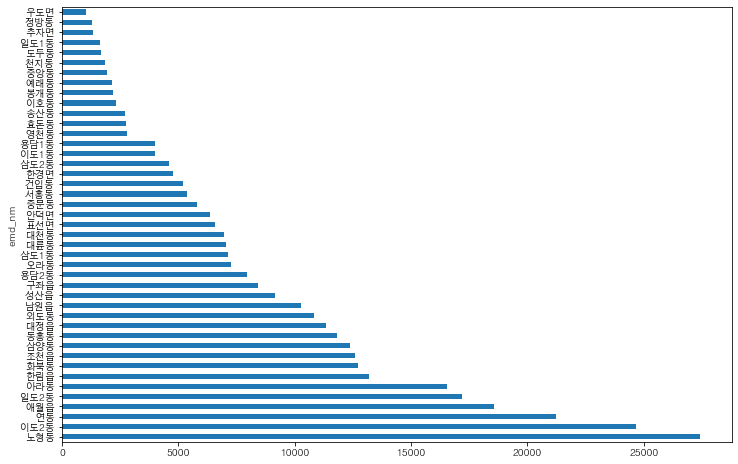

In [123]:
plt.figure(figsize = (12,8))
pop_man_2018.groupby('emd_nm')['total_pop'].mean().sort_values(ascending=False).plot.barh()

In [131]:
# 2020
pop_man_2020 = pop.query('base_year == 2020 & sex == "남성"')
pop_man_2020.describe()

base_year  base_month        emd_cd  resid_reg_pop  foreign_pop  \
count      516.0  516.000000  5.160000e+02     516.000000   516.000000   
mean      2020.0    6.500000  5.011841e+07    7851.949612   316.106589   
std          0.0    3.455402  9.772501e+03    6400.447314   429.163397   
min       2020.0    1.000000  5.011025e+07     899.000000    10.000000   
25%       2020.0    3.750000  5.011054e+07    2660.500000    66.000000   
50%       2020.0    6.500000  5.011065e+07    6312.500000   127.000000   
75%       2020.0    9.250000  5.013052e+07   10986.250000   380.750000   
max       2020.0   12.000000  5.013062e+07   27019.000000  2375.000000   

          total_pop  
count    516.000000  
mean    8168.056202  
std     6616.661633  
min      918.000000  
25%     2718.000000  
50%     6578.000000  
75%    11872.000000  
max    28147.000000

In [132]:
pop_man_2020_sorted_by_values = pop_man_2020.sort_values(by='total_pop' ,ascending=False)
pop_man_2020_sorted_by_values

base_year  base_month city    emd_cd emd_nm sex  resid_reg_pop  \
3016       2020          12  제주시  50110660    노형동  남성          27019   
2930       2020          11  제주시  50110660    노형동  남성          26927   
2844       2020          10  제주시  50110660    노형동  남성          26850   
2672       2020           8  제주시  50110660    노형동  남성          26778   
2586       2020           7  제주시  50110660    노형동  남성          26749   
...         ...         ...  ...       ...    ...  ..            ...   
2718       2020           8  제주시  50110330    우도면  남성            921   
2976       2020          11  제주시  50110330    우도면  남성            910   
3062       2020          12  제주시  50110330    우도면  남성            908   
2890       2020          10  제주시  50110330    우도면  남성            909   
2804       2020           9  제주시  50110330    우도면  남성            908   

      foreign_pop  total_pop  
3016         1128      28147  
2930         1139      28066  
2844         1153      28003  
2672         1195      27973  
2586         1218      27967  
...           ...        ...  
2718           11        932  
2976           10        920  
3062           11        919  
2890           10        919  
2804           10        918  

[516 rows x 9 columns]

<AxesSubplot:ylabel='emd_nm'>

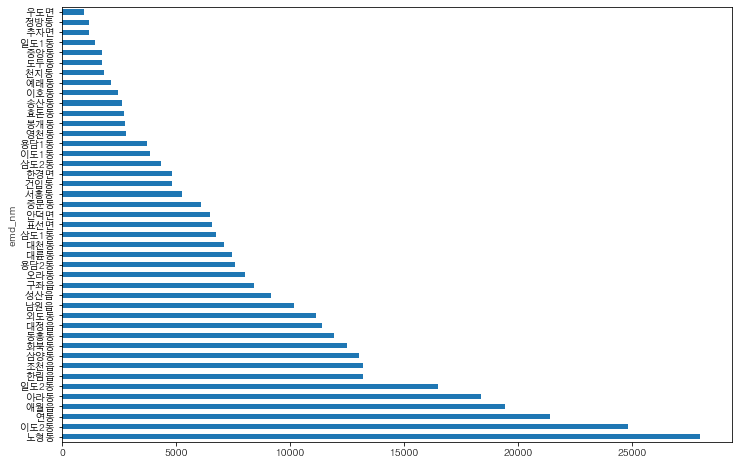

In [186]:
plt.figure(figsize = (12,8))
pop_man_2020.groupby('emd_nm')['total_pop'].mean().sort_values(ascending=False).plot.barh()

In [174]:
# 년도 구분 없이

pm = pop_man.groupby('emd_nm')['total_pop'].mean().sort_values(ascending=False)
np.array(pm)

##### 여성

In [138]:
# 여성
pop_woman = pop.query('base_year in [2018, 2019, 2020, 2021] & sex == "여성"')
print(pop_man.total_pop.describe())
pop_woman.total_pop.describe()

count     1806.000000
mean      8138.584164
std       6555.614901
min        908.000000
25%       2731.250000
50%       6591.500000
75%      11793.500000
max      28295.000000
Name: total_pop, dtype: float64


count     1806.000000
mean      7986.439092
std       6720.958891
min        763.000000
25%       2571.250000
50%       6153.000000
75%      11681.750000
max      29178.000000
Name: total_pop, dtype: float64

In [172]:
pw = pop_woman.groupby('emd_nm')['total_pop'].mean().sort_values(ascending=False)
pwa = np.array(pw)

<AxesSubplot:ylabel='emd_nm'>

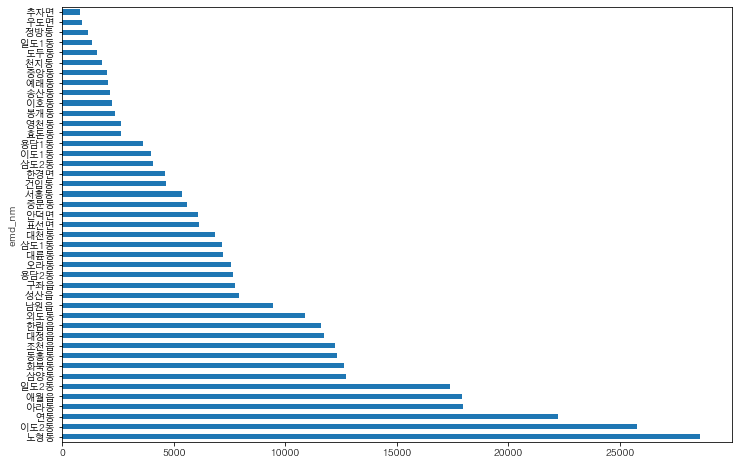

In [139]:
plt.figure(figsize = (12,8))
pop_woman.groupby('emd_nm')['total_pop'].mean().sort_values(ascending=False).plot.barh()

In [148]:
# 전체

stotal_pop = pop.groupby(['base_year','base_month','emd_nm'])['total_pop'].agg([('pop_sum','sum')])
stotal_pop

pop_sum
base_year base_month emd_nm         
2018      1          건입동       10028
                     구좌읍       16126
                     남원읍       19740
                     노형동       54958
                     대륜동       13651
...                              ...
2021      6          표선면       12681
                     한경면        9495
                     한림읍       24462
                     화북동       24630
                     효돈동        5314

[1806 rows x 1 columns]

In [149]:
pop

base_year  base_month  city    emd_cd emd_nm sex  resid_reg_pop  \
0          2018           1   제주시  50110590    건입동  남성           5085   
1          2018           1   제주시  50110590    건입동  여성           4715   
2          2018           1   제주시  50110256    구좌읍  남성           7965   
3          2018           1   제주시  50110256    구좌읍  여성           7609   
4          2018           1  서귀포시  50130253    남원읍  남성           9806   
...         ...         ...   ...       ...    ...  ..            ...   
3607       2021           6   제주시  50110250    한림읍  여성          10341   
3608       2021           6   제주시  50110600    화북동  남성          12062   
3609       2021           6   제주시  50110600    화북동  여성          12238   
3610       2021           6  서귀포시  50130550    효돈동  남성           2660   
3611       2021           6  서귀포시  50130550    효돈동  여성           2597   

      foreign_pop  total_pop  
0             146       5231  
1              82       4797  
2             368       8333  
3             184       7793  
4             428      10234  
...           ...        ...  
3607         1140      11481  
3608          169      12231  
3609          161      12399  
3610           39       2699  
3611           18       2615  

[3612 rows x 9 columns]

In [166]:
new_pop = pd.merge(pop, stotal_pop,on=['base_year','base_month','emd_nm'], how='inner' )

In [170]:
plt.figure(figsize = (12,8))
new_pop.groupby(['emd_nm','sex'])['total_pop'].mean().sort_values(ascending=False)

emd_nm  sex
노형동     여성     28563.095238
        남성     27798.595238
이도2동    여성     25761.285714
        남성     24755.095238
연동      여성     22198.238095
                   ...     
정방동     남성      1220.738095
        여성      1182.785714
우도면     남성       977.714286
        여성       880.285714
추자면     여성       810.785714
Name: total_pop, Length: 86, dtype: float64

<Figure size 864x576 with 0 Axes>

##### 내국인, 외국인

In [184]:
new_pop.groupby('emd_nm')['resid_reg_pop'].mean().sort_values(ascending=False)
new_pop.groupby('emd_nm')['foreign_pop'].mean().sort_values(ascending=False)

emd_nm
한림읍     1788.083333
노형동     1093.321429
연동       982.428571
성산읍      845.761905
대정읍      842.464286
동홍동      595.059524
아라동      567.535714
애월읍      522.916667
남원읍      364.833333
이도2동     321.142857
안덕면      313.166667
구좌읍      304.702381
조천읍      291.857143
송산동      276.571429
표선면      204.642857
화북동      195.059524
한경면      181.678571
추자면      157.023810
중문동      155.297619
일도2동     149.952381
외도동      146.583333
삼도2동     130.095238
예래동      125.678571
삼양동      123.750000
건입동      123.321429
용담2동     118.226190
오라동      115.976190
대천동      111.273810
대륜동      101.119048
영천동       90.119048
이호동       83.880952
삼도1동      81.928571
이도1동      66.607143
도두동       63.345238
서홍동       61.511905
정방동       57.726190
천지동       55.392857
중앙동       47.095238
일도1동      44.773810
봉개동       43.916667
용담1동      43.916667
효돈동       38.273810
우도면       15.630952
Name: foreign_pop, dtype: float64

<AxesSubplot:ylabel='emd_nm'>

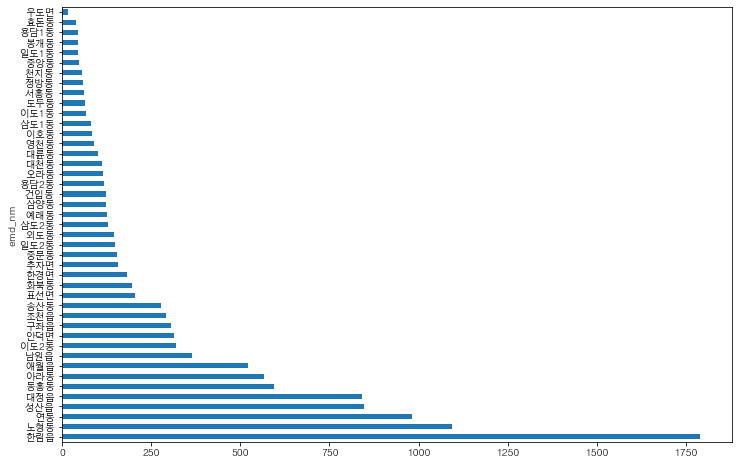

In [190]:
plt.figure(figsize = (12,8))
new_pop.groupby('emd_nm')['foreign_pop'].mean().sort_values(ascending=False).plot.barh()